# Question Q11

*Question*: Which Non-Functional Requirements (NFRs) do typically play a major role in terms of criticality in the ML-enabled system projects you participated in?

*Answer Type*: Multiple Option and Free Field

*Options*: [To the best of my knowledge NFRs were not considered, Data quality, Model Accountability (the need for someone to be held accountable should a machine learning algorithm go wrong), Model Ethics and Fairness (to what extend the model predictions are ethical and fair), Model Explainability (to what extent the model allows explaining its predictions), Model Interactiveness (to what extent the user can provide feedback to the system and "collaborate" with the system), Model Reliability/Confidence/Accuracy (to what extent are the predictions trustable), Model Transparency (to what extent the model reveals the internal decision making structure), System Compatibility, System Maintainability, System Performance, System Portability, System Privacy, System Reliability, System Safety, System Security, System Usability, Others please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# question options
nfrs = {
    'Q11_ML_NFRs_Not_Considered': 'Not Considered',
    'Q11_ML_NFRs_Data_Quality': 'Data Quality',
    'Q11_ML_NFRs_Model_Accountability': 'Model Accountability',
    'Q11_ML_NFRs_Model_Ethics_Fairness': 'Model Ethics Fairness',
    'Q11_ML_NFRs_Model_Explainability': 'Model Explainability',
    'Q11_ML_NFRs_Model_Interactiveness': 'Model Interactiveness',
    'Q11_ML_NFRs_Model_Reliability': 'Model Reliability',
    'Q11_ML_NFRs_Model_Transparency': 'Model Transparency',
    'Q11_ML_NFRs_System_Compatibility': 'System Compatibility',
    'Q11_ML_NFRs_System_Maintanibility': 'System Maintanibility',
    'Q11_ML_NFRs_System_Performance': 'System Performance',
    'Q11_ML_NFRs_System_Portability': 'System Portability',
    'Q11_ML_NFRs_System_Privacy': 'System Privacy',
    'Q11_ML_NFRs_System_Reliability': 'System Reliability',
    'Q11_ML_NFRs_System_Safety': 'System Safety',
    'Q11_ML_NFRs_System_Security': 'System Security',
    'Q11_ML_NFRs_System_Usability': 'System Usability',
    'Q11_ML_NFRs_Others': 'Others'
}

### Basic Analysis

In [4]:
dataframe_obj.df[['Q11_ML_NFRs_Not_Considered', 'Q11_ML_NFRs_Data_Quality', 'Q11_ML_NFRs_Model_Accountability',
                  'Q11_ML_NFRs_Model_Ethics_Fairness', 'Q11_ML_NFRs_Model_Explainability', 
                  'Q11_ML_NFRs_Model_Interactiveness', 'Q11_ML_NFRs_Model_Reliability', 
                  'Q11_ML_NFRs_Model_Transparency', 'Q11_ML_NFRs_System_Compatibility',
                  'Q11_ML_NFRs_System_Maintanibility', 'Q11_ML_NFRs_System_Performance',
                  'Q11_ML_NFRs_System_Portability', 'Q11_ML_NFRs_System_Privacy', 
                  'Q11_ML_NFRs_System_Reliability', 'Q11_ML_NFRs_System_Safety', 'Q11_ML_NFRs_System_Security',
                  'Q11_ML_NFRs_System_Usability', 'Q11_ML_NFRs_Others', 'Q11_ML_NFRs_Others_Free']].head()

,Q11_ML_NFRs_Not_Considered,Q11_ML_NFRs_Data_Quality,Q11_ML_NFRs_Model_Accountability,Q11_ML_NFRs_Model_Ethics_Fairness,Q11_ML_NFRs_Model_Explainability,Q11_ML_NFRs_Model_Interactiveness,Q11_ML_NFRs_Model_Reliability,Q11_ML_NFRs_Model_Transparency,Q11_ML_NFRs_System_Compatibility,Q11_ML_NFRs_System_Maintanibility,Q11_ML_NFRs_System_Performance,Q11_ML_NFRs_System_Portability,Q11_ML_NFRs_System_Privacy,Q11_ML_NFRs_System_Reliability,Q11_ML_NFRs_System_Safety,Q11_ML_NFRs_System_Security,Q11_ML_NFRs_System_Usability,Q11_ML_NFRs_Others,Q11_ML_NFRs_Others_Free
0,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
1,not quoted,quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
2,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,-99
3,not quoted,quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
4,not quoted,quoted,quoted,quoted,quoted,quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,-99


In [5]:
indexes = []
values = []
chart_positions = []
for nfr in nfrs:
    indexes.append(nfrs[nfr])
    values.append(dataframe_obj.df[nfr].value_counts()['quoted'])
    chart_positions.append(1 if '_Others' not in nfr else 0)

In [6]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    if row['Q11_ML_NFRs_Not_Considered'] == 'quoted' or row['Q11_ML_NFRs_Data_Quality'] == 'quoted' or row['Q11_ML_NFRs_Model_Accountability'] == 'quoted' or row['Q11_ML_NFRs_Model_Ethics_Fairness'] == 'quoted' or row['Q11_ML_NFRs_Model_Explainability'] == 'quoted' or row['Q11_ML_NFRs_Model_Interactiveness'] == 'quoted' or row['Q11_ML_NFRs_Model_Reliability'] == 'quoted' or row['Q11_ML_NFRs_Model_Transparency'] == 'quoted' or row['Q11_ML_NFRs_System_Compatibility'] == 'quoted' or row['Q11_ML_NFRs_System_Maintanibility'] == 'quoted' or row['Q11_ML_NFRs_System_Performance'] == 'quoted' or row['Q11_ML_NFRs_System_Portability'] == 'quoted' or row['Q11_ML_NFRs_System_Privacy'] == 'quoted' or row['Q11_ML_NFRs_System_Reliability'] == 'quoted' or row['Q11_ML_NFRs_System_Safety'] == 'quoted' or row['Q11_ML_NFRs_System_Security'] == 'quoted' or row['Q11_ML_NFRs_System_Usability'] == 'quoted' or row['Q11_ML_NFRs_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)

In [7]:
# plot object
q11_plot = PlotUtils(pd.DataFrame(
    data={'NFRs': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

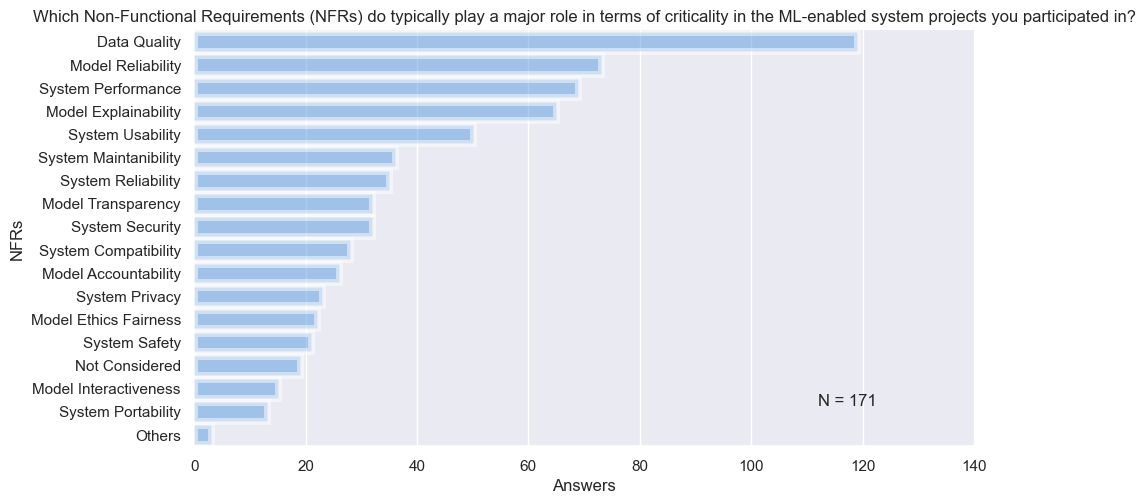

In [8]:
q11_plot.single_barplot(x_axis="Answers", y_axis="NFRs",
                       title="Which Non-Functional Requirements (NFRs) do typically play a major role in terms of criticality in the ML-enabled system projects you participated in?",
                       x_label="Answers", y_label="NFRs", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [9]:
# remove unnecessary values
nfrs_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q11_ML_NFRs_Others_Free'])))
nfrs_free = list(filter(lambda a: str(a) != '-66', nfrs_free))
nfrs_free = list(filter(lambda a: str(a) != 'nan', nfrs_free))

In [10]:
nfrs_words = format_wordcloud_text(texts=nfrs_free, use_sep=False)

In [11]:
# plot object
q11_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(nfrs_words.keys()), 'Weight': list(nfrs_words.values())}
))

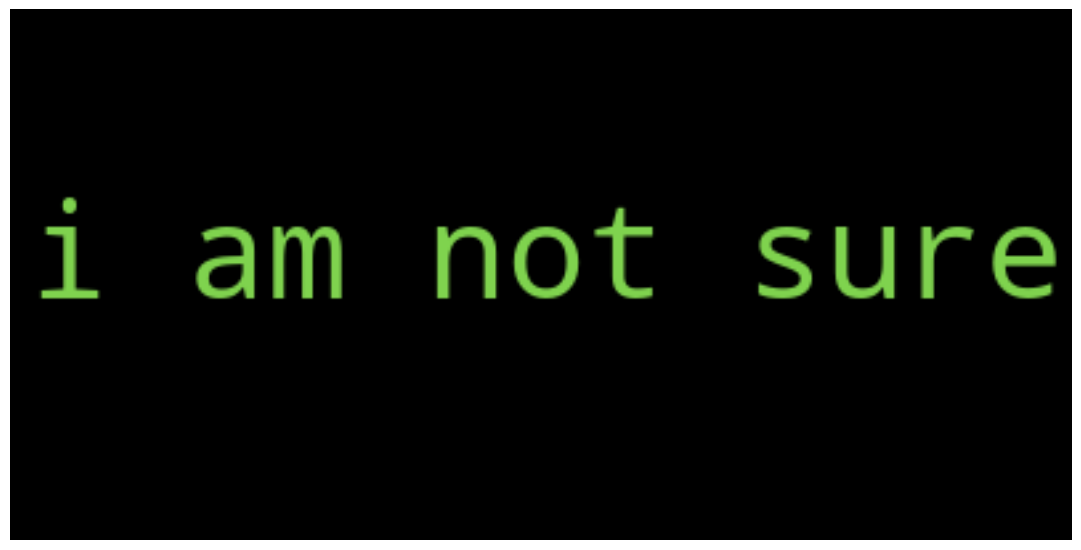

In [12]:
q11_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [13]:
prefix = "Q11_ML_NFRs_"

In [14]:
# the possible answers are the ones in columns
valid_options_list = [nfrs_column.split(prefix)[1] for nfrs_column in nfrs]

In [15]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [16]:
bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, 1000, 100, 95)

In [17]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [18]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [nfrs[prefix + idx] for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [19]:
# plot object for bootstrapped data
q11_boot_plot = PlotUtils(pd.DataFrame(
    data={'NFRs': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

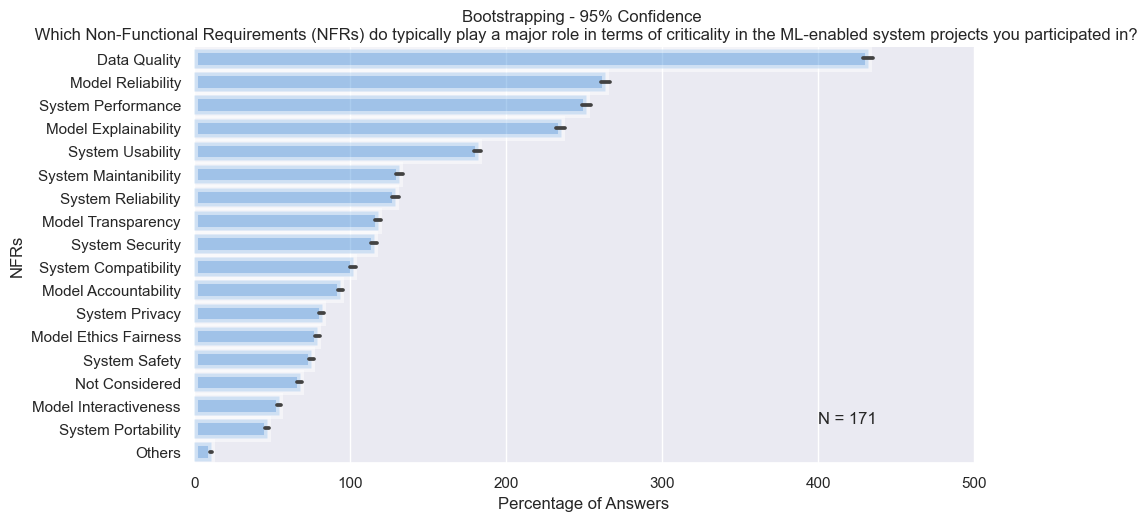

In [20]:
q11_boot_plot.single_barplot(x_axis="Value", y_axis="NFRs", 
                       title="Bootstrapping - 95% Confidence \n Which Non-Functional Requirements (NFRs) do typically play a major role in terms of criticality in the ML-enabled system projects you participated in?",
                       x_label="Percentage of Answers", y_label="NFRs", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [21]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Not_Considered:(66.21955734931615, 67.82, 69.42044265068384)
Data_Quality:(428.4924865926453, 431.84, 435.18751340735463)
Model_Accountability:(91.9901171472747, 93.83, 95.6698828527253)
Model_Ethics_Fairness:(77.38226195593309, 78.97, 80.55773804406691)
Model_Explainability:(232.37207857989006, 234.98, 237.58792142010992)
Model_Interactiveness:(53.02169412132991, 54.24, 55.458305878670096)
Model_Reliability:(260.2955104233818, 263.32, 266.3444895766182)
Model_Transparency:(115.82296820883259, 117.86, 119.89703179116741)
System_Compatibility:(99.94054500508643, 101.72, 103.49945499491356)
System_Maintanibility:(129.4952736545227, 131.58, 133.66472634547733)
System_Performance:(248.87545128744748, 251.49, 254.10454871255254)
System_Portability:(45.36943993088242, 46.76, 48.150560069117574)
System_Privacy:(80.00841030926658, 81.71, 83.41158969073341)
System_Reliability:(126.59682770498132, 128.83, 131.0631722950187)
System_Safety:(73.5797273789269